In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data Collection and Analysis



In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.shape

(768, 9)

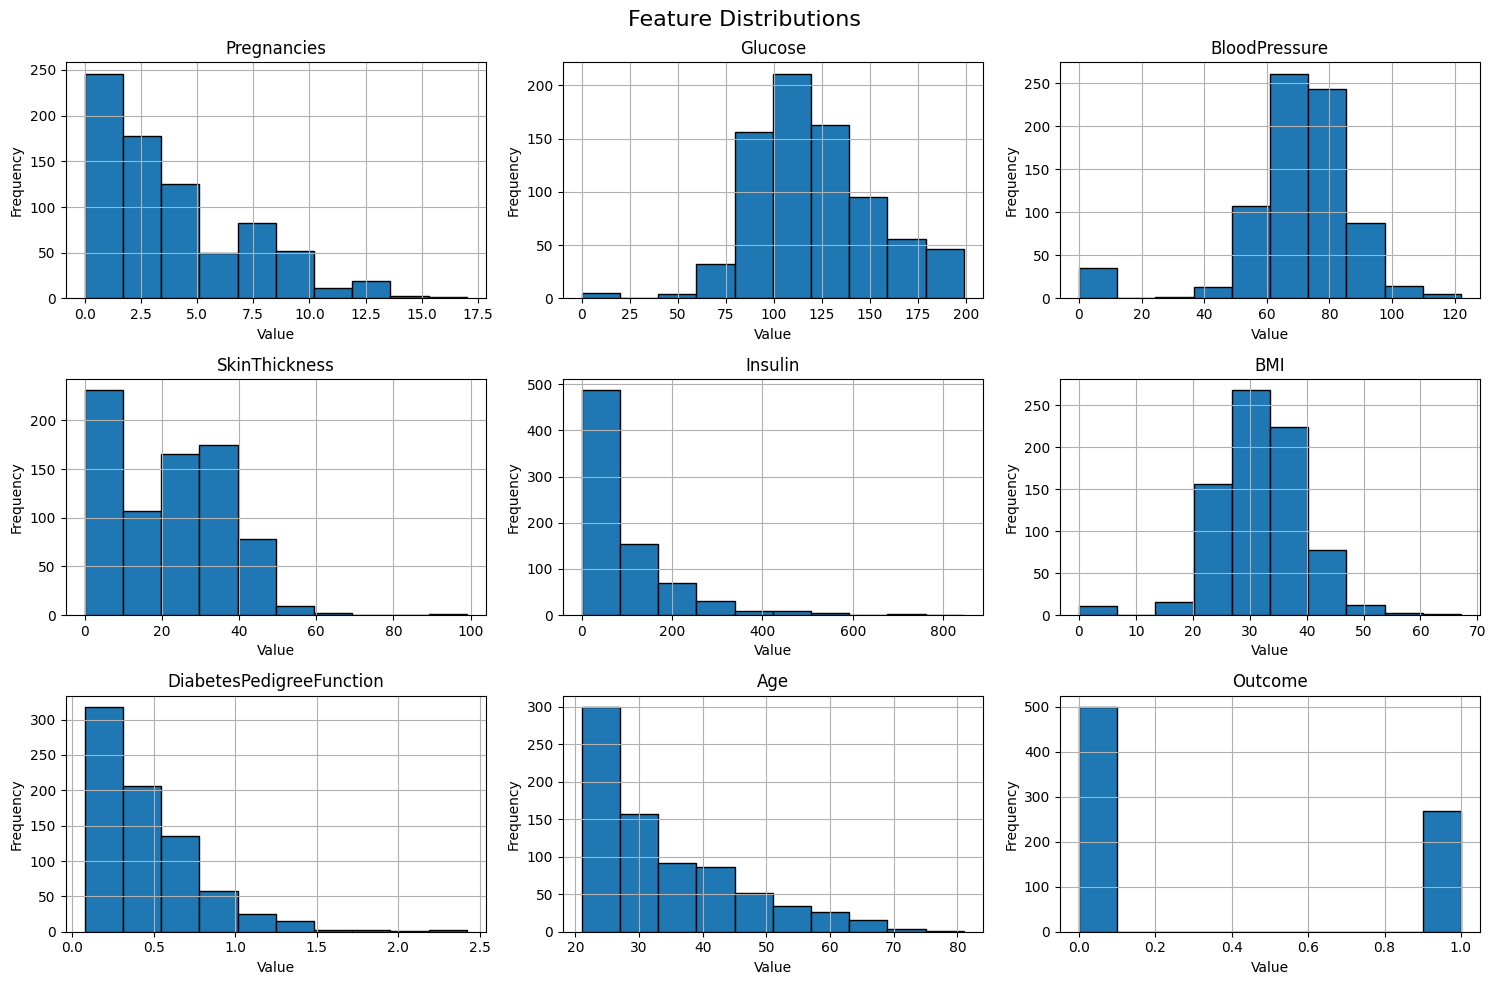

In [5]:
axes = diabetes_data.hist(bins=10, figsize=(15,10),edgecolor="black")
plt.suptitle('Feature Distributions',fontsize=16)
# Loop through each axis and label the x and y axes
for ax in axes.flatten():
    ax.set_xlabel('Value')  # X-axis label showing the range of values for the feature
    ax.set_ylabel('Frequency')  # Y-axis label representing how often each value occurs

plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

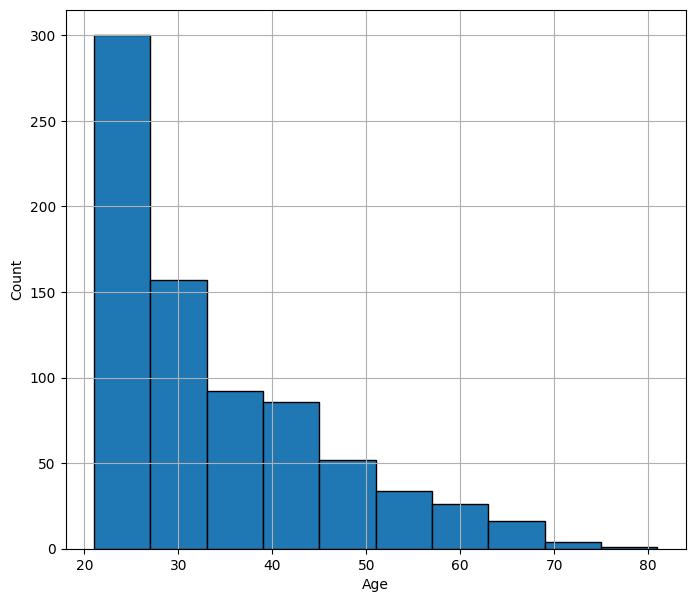

In [6]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
diabetes_data['Age'].hist(edgecolor="black")

In [7]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
print("MAX AGE: "+str(diabetes_data['Age'].max()))
print("MIN AGE: "+str(diabetes_data['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [9]:
diabetes_data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**CORRELATION MATRIX**

In [11]:
corr_matrix=diabetes_data.corr()
print(corr_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

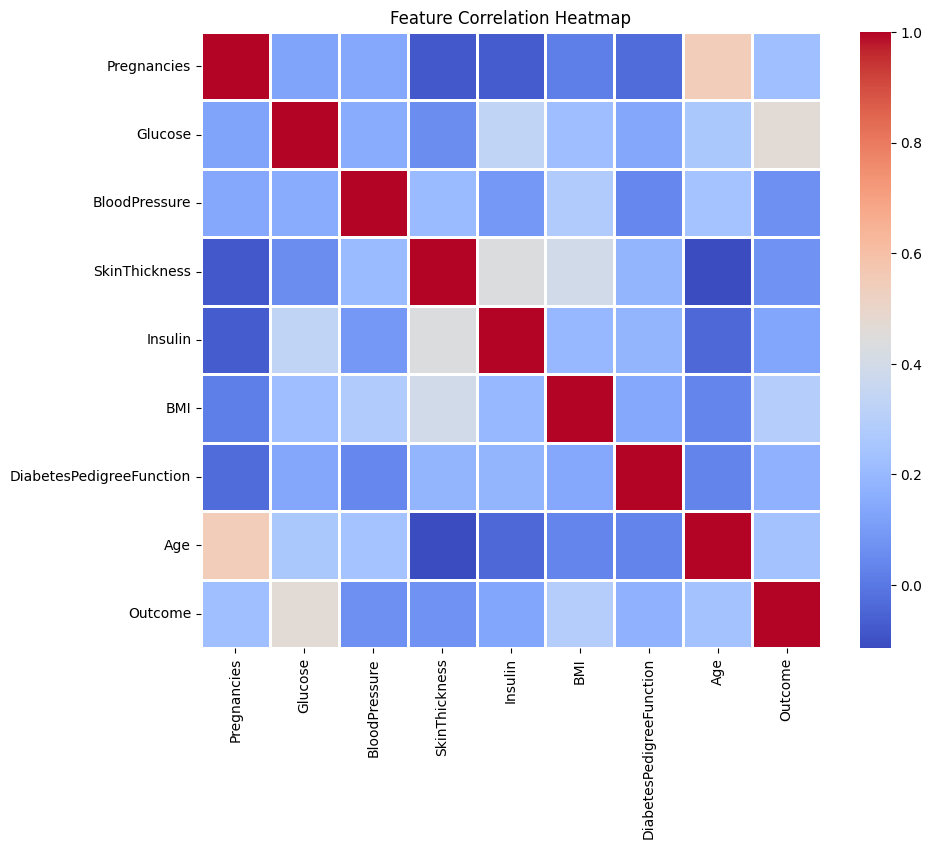

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,linewidths=1,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
counts=diabetes_data['Outcome'].value_counts()
percentage_counts = (counts / counts.sum()) * 100
print(counts)
print(percentage_counts.round())

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.0
1    35.0
Name: count, dtype: float64


**0 --> Non-Diabetic**

**1 --> Diabetic**

In [14]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
# separating the data and labels
X = diabetes_data.drop(columns = 'Outcome', axis=1)
Y = diabetes_data['Outcome']

In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [19]:

scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)

In [22]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
X = standardized_data
Y = diabetes_data['Outcome']

In [24]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


Training the Model

In [27]:
classifier = svm.SVC(kernel='linear')

In [28]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [29]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy score of the training data : ', training_data_accuracy)
print(f"Accuracy: { training_data_accuracy * 100:.2f}%")

Accuracy score of the training data :  0.7866449511400652
Accuracy: 78.66%


In [31]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
svm_accuracy=test_data_accuracy

In [32]:
print('Accuracy score of the test data for SVM: ', test_data_accuracy)

Accuracy score of the test data for SVM:  0.7727272727272727


**Random Forest**

In [33]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [34]:
# Training data prediction and accuracy score
X_train_prediction =  rf_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Accuracy: { training_data_accuracy * 100:.2f}%")

Accuracy: 100.00%


In [35]:
# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

In [36]:
# Evaluate the model
rf_accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)


In [37]:
# Print the results
print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 72.73%

Confusion Matrix:
[[86 14]
 [28 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.65      0.48      0.55        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



**Logistic Regression**

In [38]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [39]:
# Training data prediction and accuracy score
X_train_prediction =  logreg_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Accuracy: { training_data_accuracy * 100:.2f}%")

Accuracy: 78.50%


In [40]:
# Make predictions on the test set
Y_pred = logreg_model.predict(X_test)

In [41]:
# Evaluate the model by calculating accuracy
logreg_accuracy = accuracy_score(Y_test, Y_pred)
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Classification Report
class_report = classification_report(Y_test, Y_pred)

In [42]:
# Print the results
print(f"Accuracy of Logistic Regression model: {logreg_accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy of Logistic Regression model: 75.97%

Confusion Matrix:
[[89 11]
 [26 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [43]:
# Prepare data for plotting
models = ['SVM', 'Random Forest', 'Logistic Regression']
scores = [svm_accuracy, rf_accuracy, logreg_accuracy]

C:\Users\ybhar\AppData\Local\Temp\ipykernel_5760\2301245492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette="viridis")


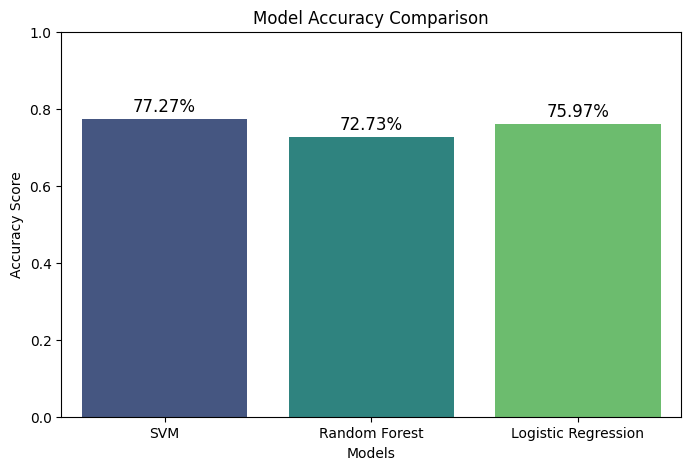

In [44]:
# Plot the accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=scores, palette="viridis")
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
# Annotating the bars with the accuracy score
for i in range(len(scores)):
    plt.text(i, scores[i] + 0.02, f'{scores[i] * 100:.2f}%', ha='center', fontsize=12)

plt.show()

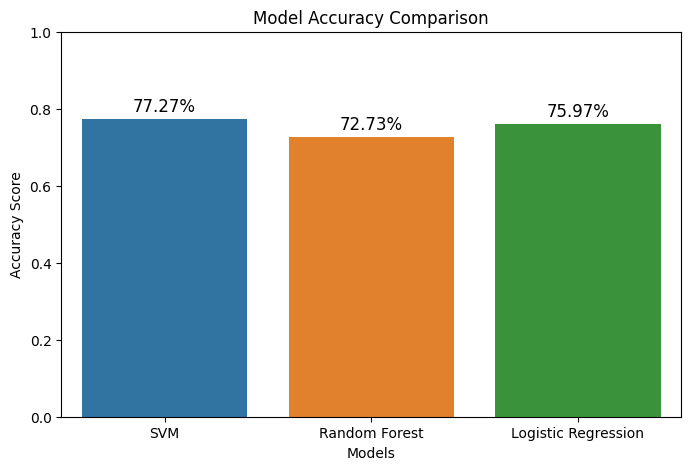

In [45]:
# Create a DataFrame for plotting
data_plot = pd.DataFrame({
    'Model': models,
    'Accuracy': scores
})
# Corrected barplot without the palette issue
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=data_plot, hue='Model', dodge=False, legend=False)
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Models')

# Annotating the bars with the accuracy score
for i in range(len(scores)):
    plt.text(i, scores[i] + 0.02, f'{scores[i] * 100:.2f}%', ha='center', fontsize=12)

plt.show()

Making a Predictive System




In [46]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is not diabetic


C:\Users\ybhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
